In [2]:
import pandas as pd
df=pd.read_csv("C:\\Users\\yasha\\Downloads\\housing (1).csv")

In [3]:
!pip install sickit-learn

ERROR: Could not find a version that satisfies the requirement sickit-learn (from versions: none)
ERROR: No matching distribution found for sickit-learn


In [4]:
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
#from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [12]:
column_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
boston_data=pd.read_csv("C:\\Users\\yasha\\Downloads\\housing (1).csv",header=None,delimiter=r"\s+",names=column_names)

In [13]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [61]:
boston_data.shape

(506, 14)

In [62]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [63]:
boston_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [64]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [65]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [66]:
boston_data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [67]:
boston_data.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


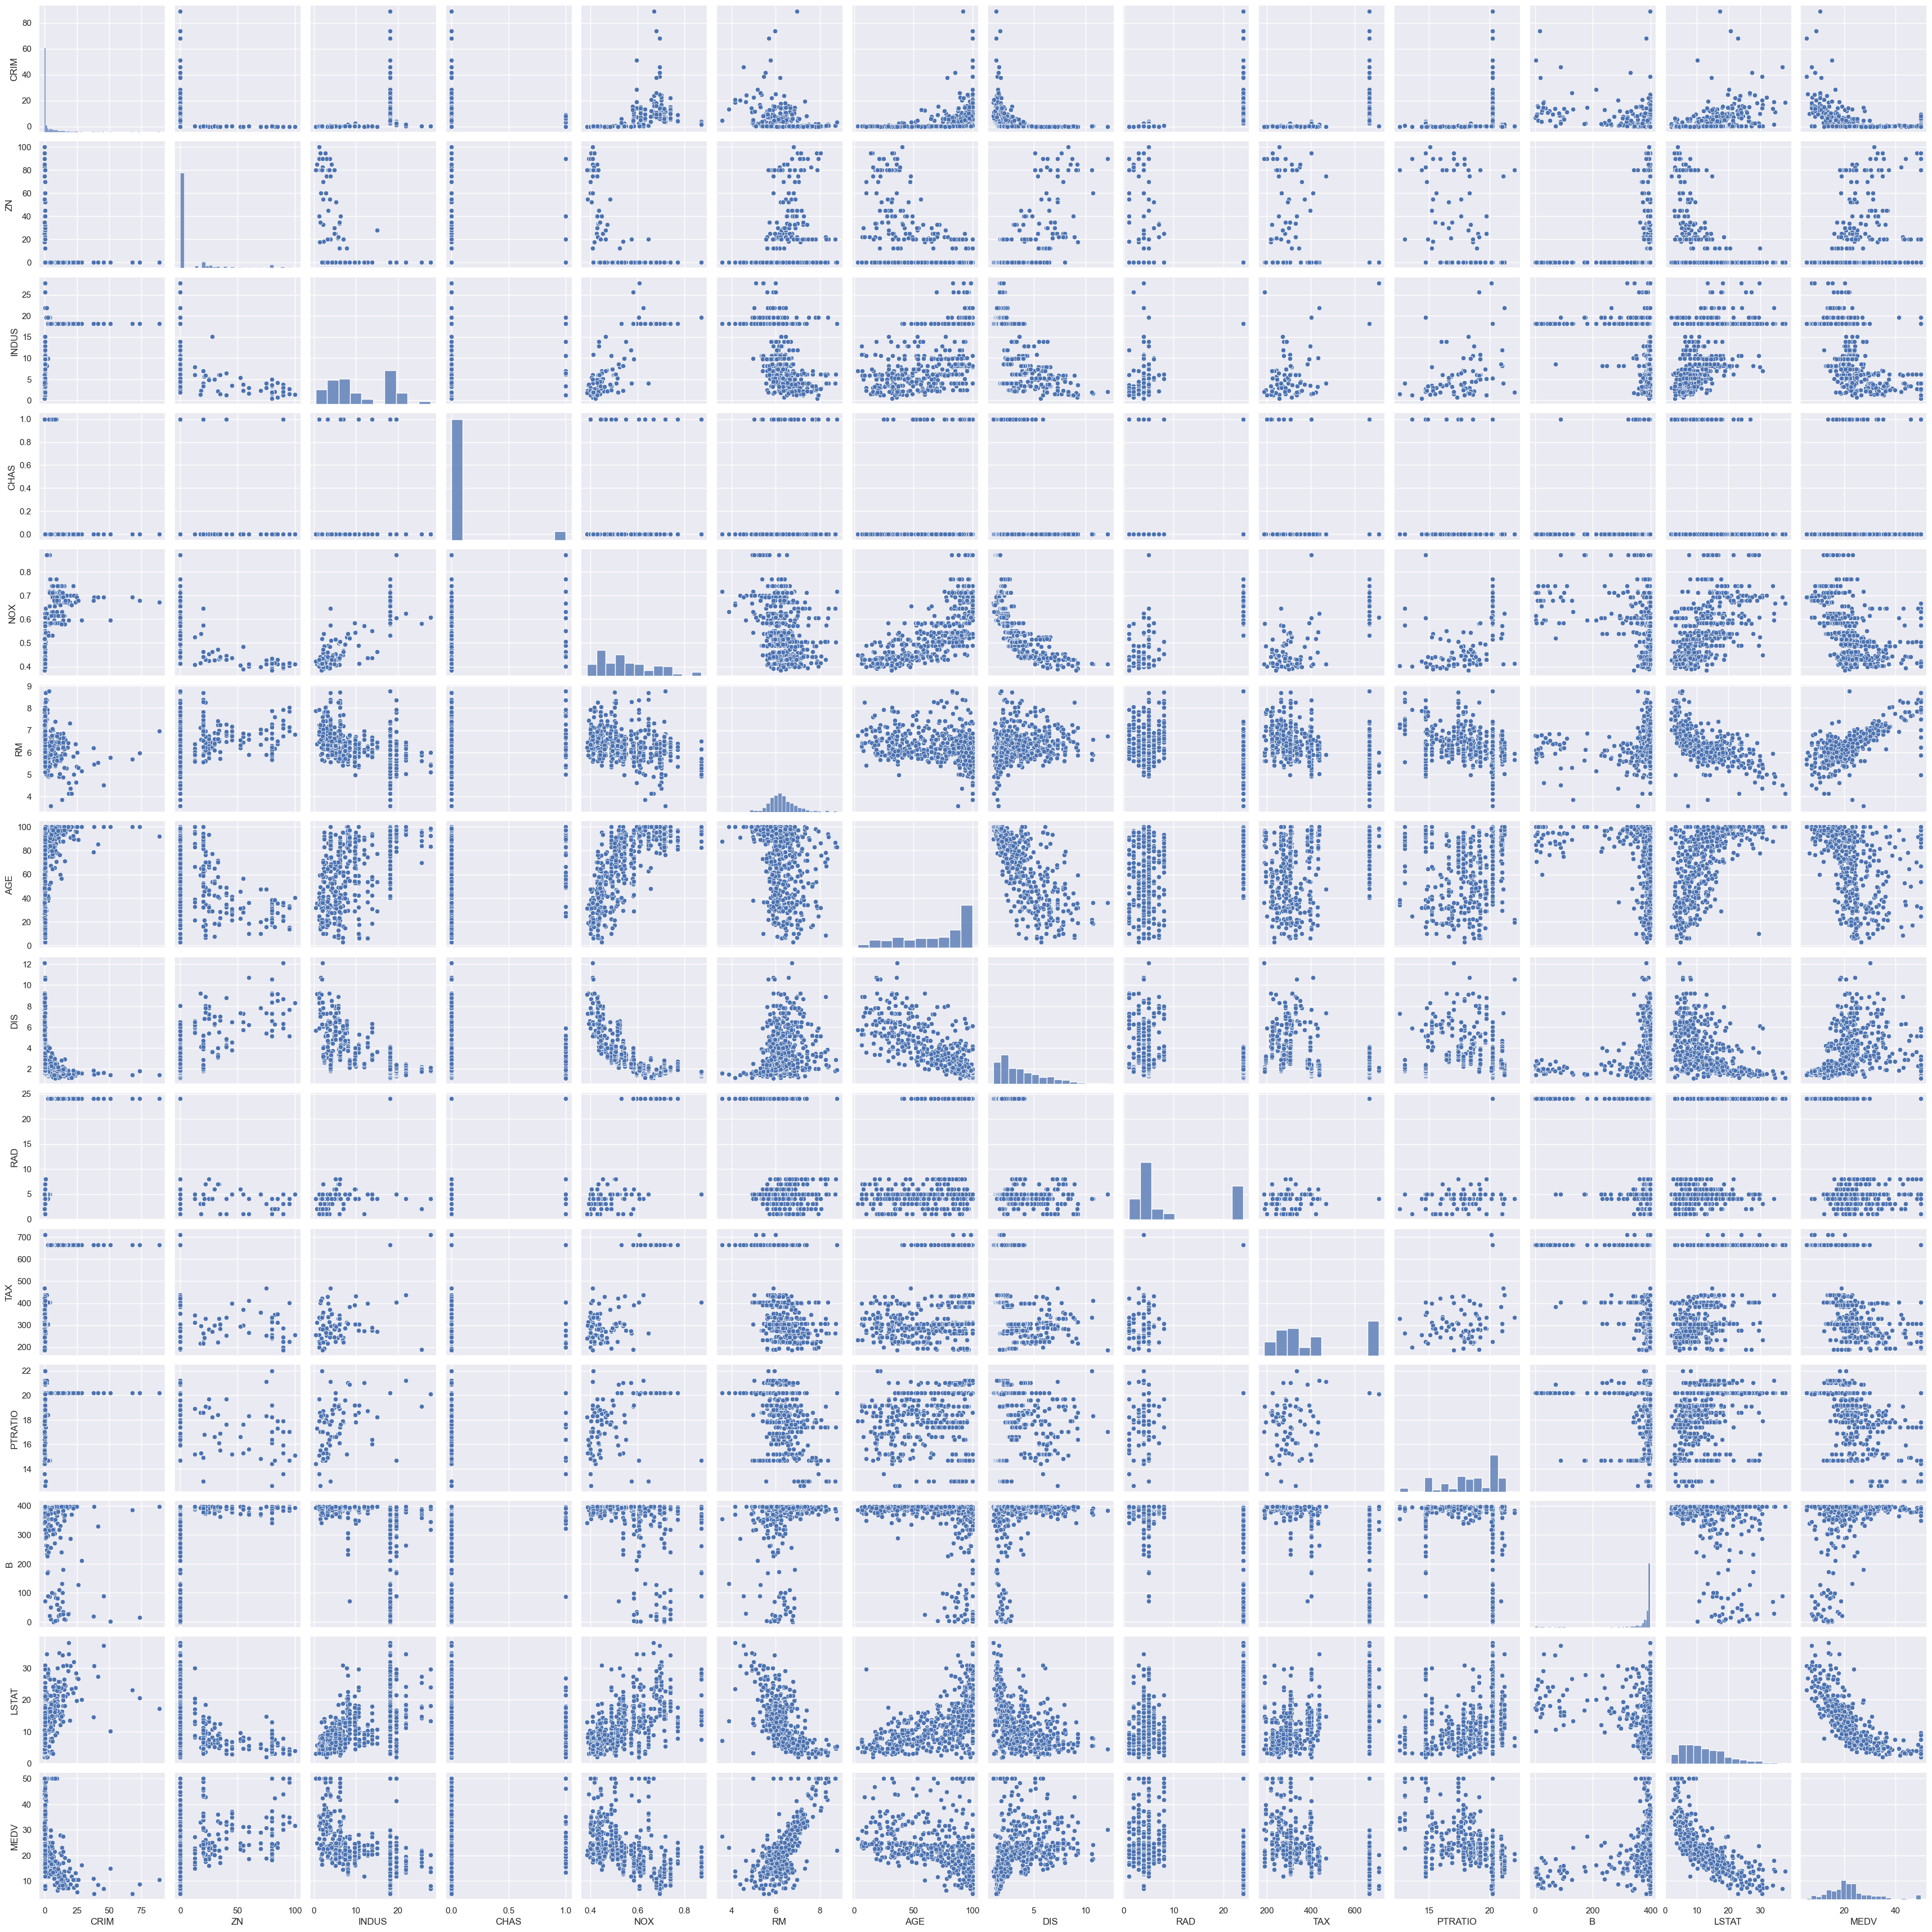

In [68]:
sns.pairplot(boston_data)

<Axes: ylabel='Count'>

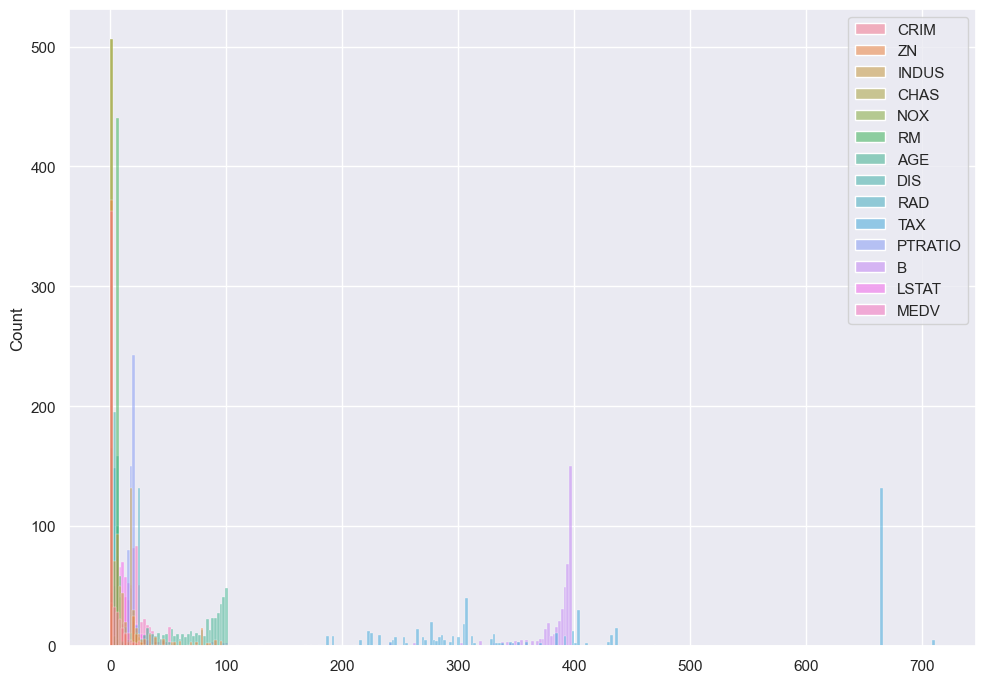

In [69]:
sns.histplot(boston_data)

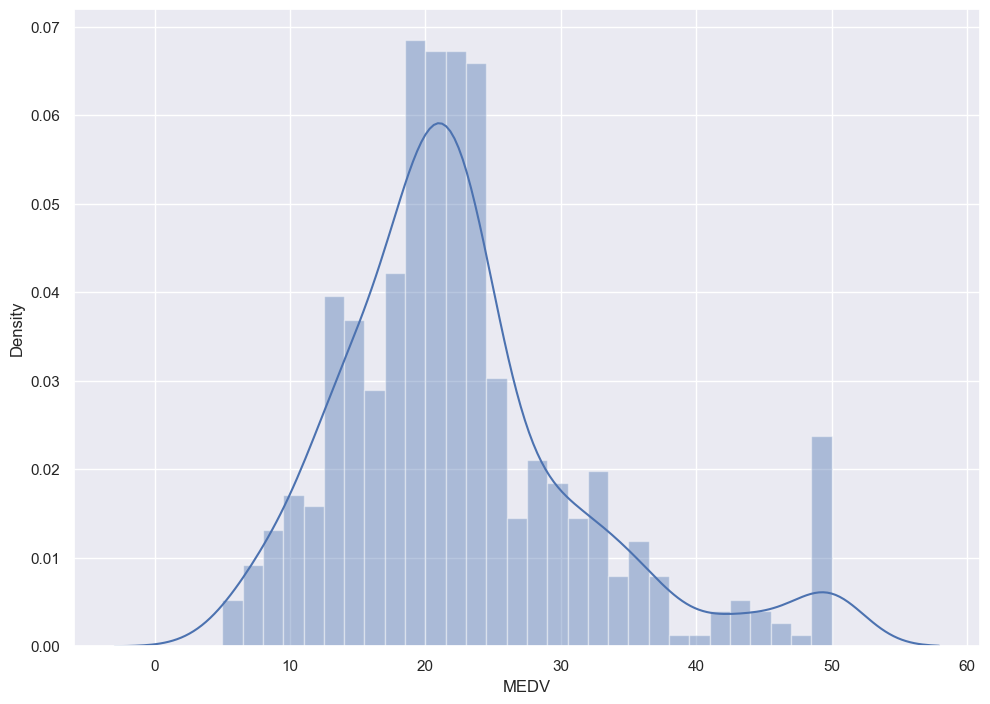

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['MEDV'],bins=30)
plt.show()

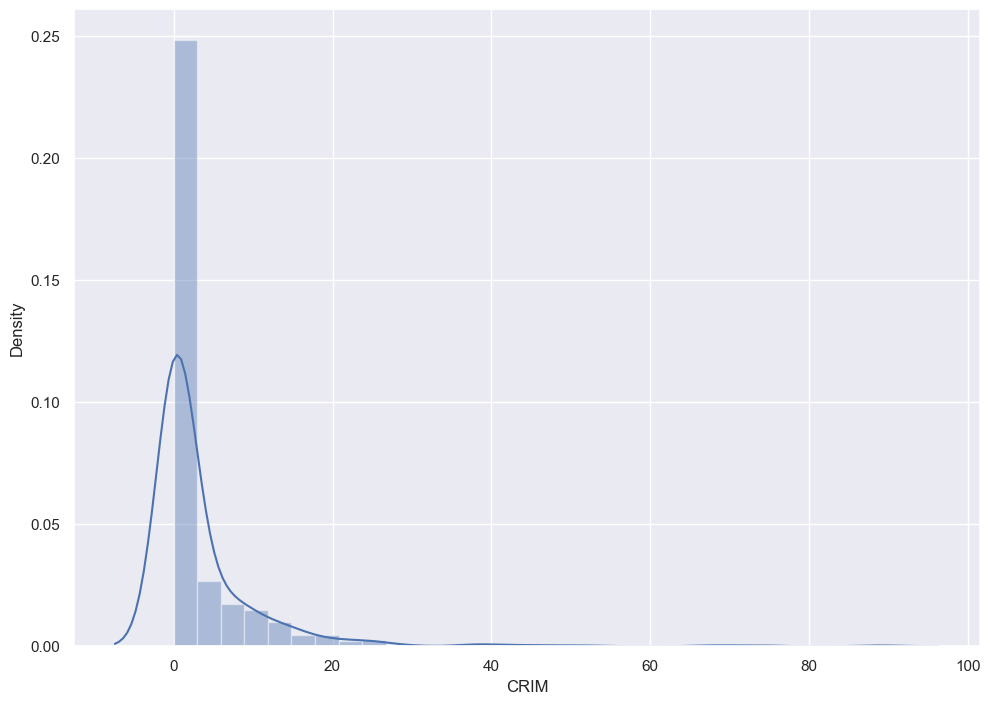

In [71]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['CRIM'],bins=30)
plt.show()

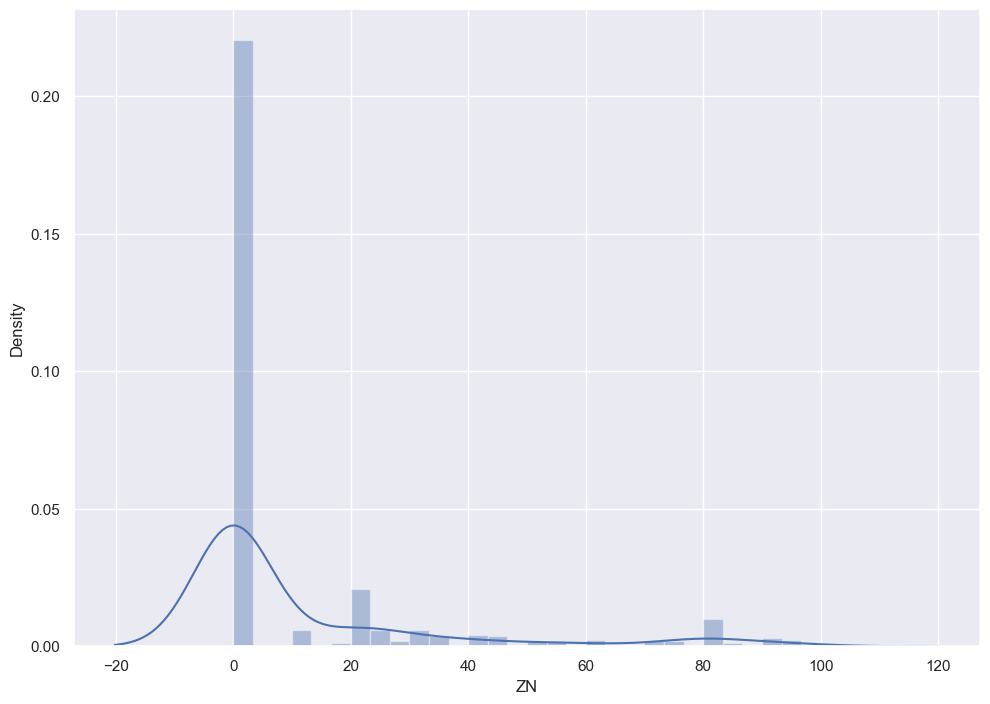

In [72]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['ZN'],bins=30)
plt.show()

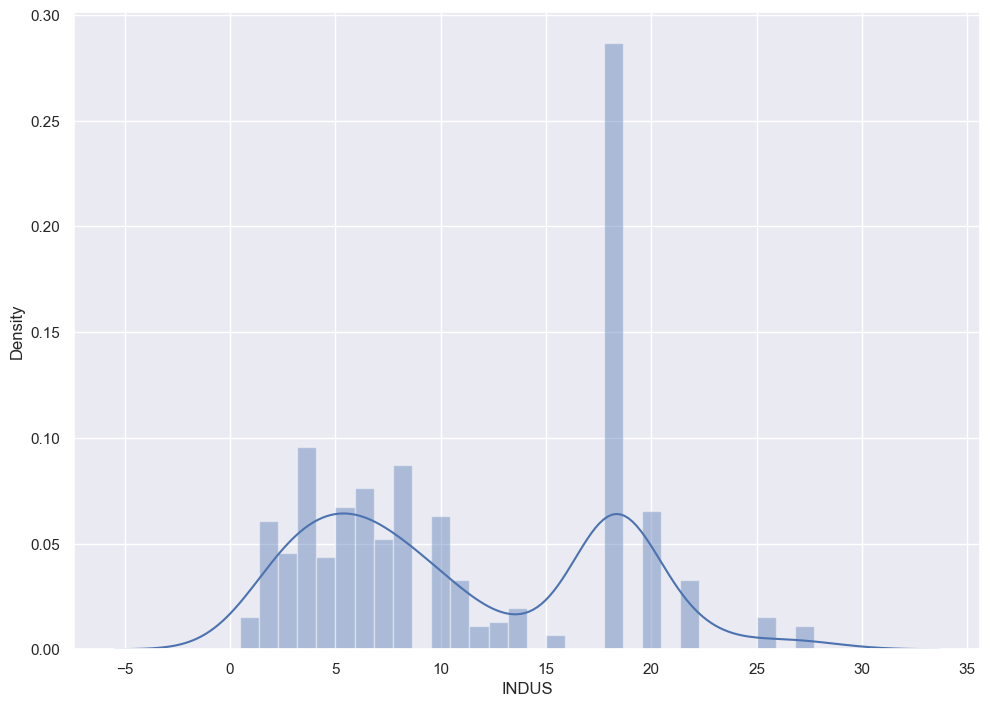

In [73]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_data['INDUS'],bins=30)
plt.show()

<Axes: >

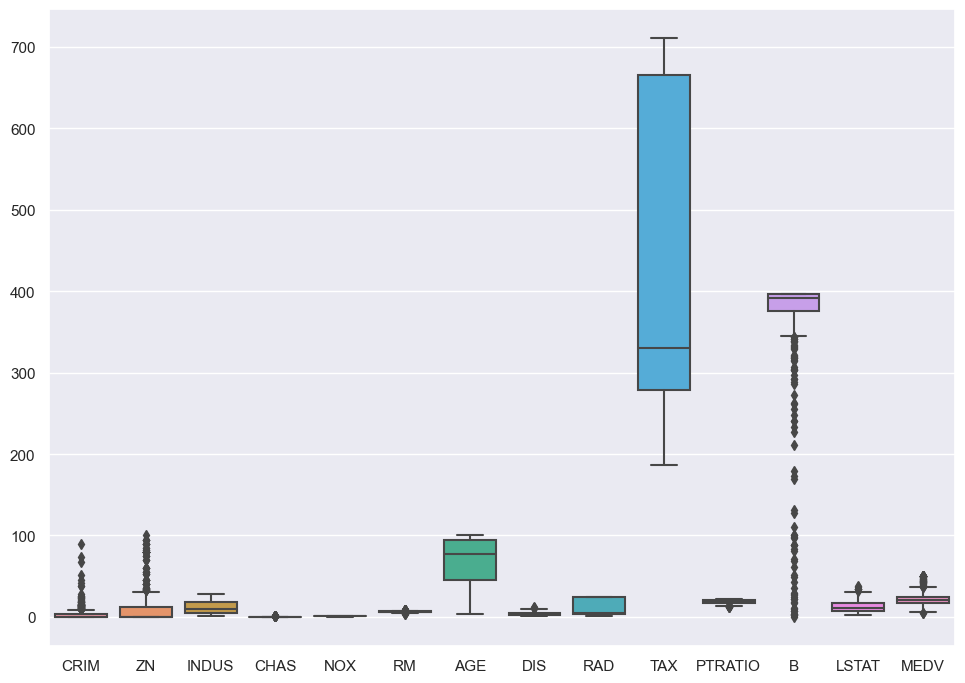

In [74]:
sns.boxplot(boston_data)

<Axes: >

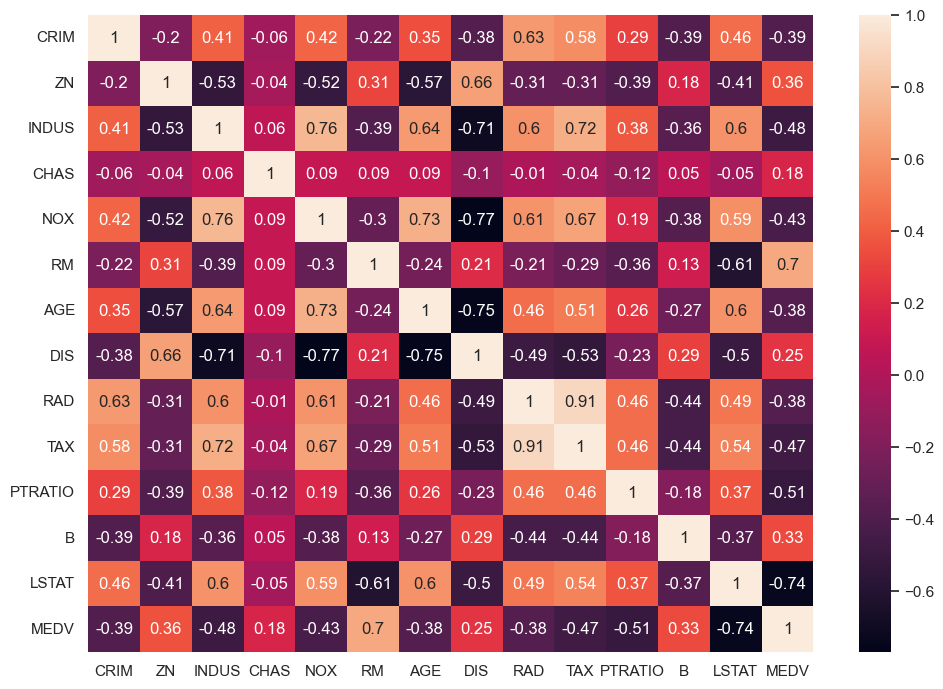

In [75]:
correlation_matrix=boston_data.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

In [91]:
x=boston_data.iloc[:,:-1]
y=boston_data['MEDV']

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [93]:
lin_model=LinearRegression()

In [94]:
lin_model.fit(x_train,y_train)
lin_model.predict(x_test)

array([37.56311787, 32.14445143, 27.06573629,  5.67080633, 35.09982577,
        5.85803701, 27.53708506, 31.81019188, 26.35634771, 22.77208748,
       31.91183048, 21.50224061, 23.70119983, 33.3622504 , 28.51633591,
       14.39456899,  0.19284025, 18.66247155, 13.71004139, 14.13408635,
        2.03263952, 19.7280831 , 38.18657429, 24.19760058, 31.30247973,
       11.14144544, 25.03636951, 23.27970871, 22.49420127, 20.52972594,
       15.16513744,  6.92553586, 18.3557733 , 22.37179804, 28.91287973,
       19.02980786, 30.19357214,  8.74384915, 40.86691522, 34.53763591,
       20.70224878,  2.59618963, 29.99590282, 12.15704798, 27.10186397,
       30.8052437 , -6.24169079, 19.84885777, 20.92973441, 12.43523958,
       20.4949947 , 19.19231742, 23.69073157, 12.67998473, 17.14252424,
       25.04649176, 34.77758126, 15.23294903, 28.22306193, 21.08745388,
       20.39506129, 25.79476888, 14.72463673, 33.18635032, 23.17771307,
       13.11057248, 19.23154617, 24.61162961, 21.50327036, 22.00

In [95]:
cvs=cross_val_score(lin_model,x,y,scoring="neg_mean_squared_error",cv=10)

In [96]:
print(cvs)
mean_cvs=np.mean(cvs)
print(mean_cvs)

[  -9.28694671  -14.15128316  -14.07360615  -35.20692433  -31.88511666
  -19.83587796   -9.94726918 -168.37537954  -33.32974507  -10.96041068]
-34.70525594452484


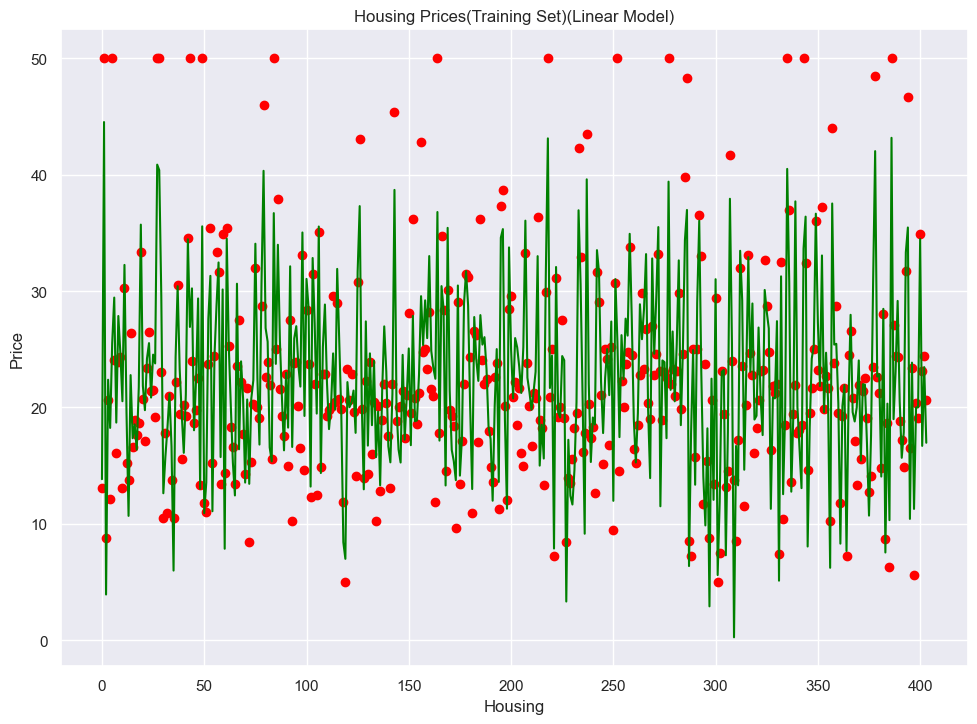

In [97]:
x_train1=np.arange(0,len(x_train),1)
plt.scatter(x_train1,y_train,color="red")
plt.plot(x_train1,lin_model.predict(x_train),color="green")
plt.title("Housing Prices(Training Set)(Linear Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

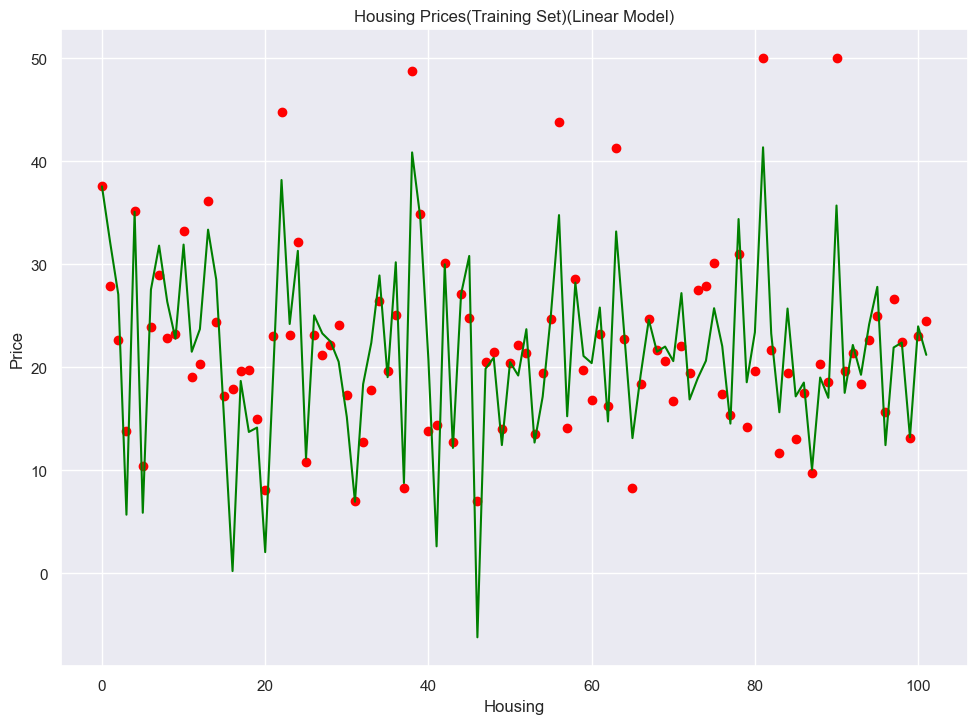

In [98]:
x_test1=np.arange(0,len(x_test),1)
plt.scatter(x_test1,y_test,color="red")
plt.plot(x_test1,lin_model.predict(x_test),color="green")
plt.title("Housing Prices(Training Set)(Linear Model)")
plt.xlabel("Housing")
plt.ylabel("Price")
plt.show()

In [99]:
ridge=Ridge()
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10]}
ridge_model=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=10)

In [85]:
ridge_model.fit(x_train,y_train)
ridge_model.predict(x_test)

array([37.55941537, 32.14462386, 27.06389466,  5.66288114, 35.09653813,
        5.85547896, 27.54335682, 31.80456995, 26.35286514, 22.76353597,
       31.90673705, 21.51125336, 23.70154494, 33.36505636, 28.51381422,
       14.39597845,  0.17450174, 18.68921633, 13.71219885, 14.12367397,
        2.01809408, 19.73086682, 38.18284222, 24.19988164, 31.30182003,
       11.14800053, 25.03887303, 23.2764881 , 22.50855242, 20.53793309,
       15.15603698,  6.91254241, 18.35839496, 22.37842661, 28.90793341,
       19.03226237, 30.18771631,  8.7410183 , 40.87741304, 34.54236045,
       20.70530562,  2.59043069, 29.99153445, 12.16195116, 27.09132982,
       30.80037631, -6.24554044, 19.84244671, 20.9570884 , 12.43352721,
       20.49095699, 19.19606318, 23.6797889 , 12.68025597, 17.16865797,
       25.05314269, 34.77585696, 15.23836324, 28.21485879, 21.08485459,
       20.39795122, 25.7949218 , 14.7246174 , 33.179988  , 23.19184978,
       13.11234865, 19.23623349, 24.61405643, 21.49630518, 21.99

In [ ]:
print(ridge_model)

In [86]:
lasso=Lasso()
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10]}
lasso_model=GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=10)

In [87]:
lasso_model.fit(x_train,y_train)
lasso_model.predict(x_test)

array([37.55246613, 32.1454225 , 27.06059124,  5.64956628, 35.07646748,
        5.85219766, 27.55452981, 31.78238029, 26.34691719, 22.74993594,
       31.89636497, 21.52694755, 23.70420561, 33.36798031, 28.51073181,
       14.39976197,  0.14571673, 18.73771148, 13.71569301, 14.11120963,
        1.99520903, 19.73808669, 38.17463252, 24.20453531, 31.30033596,
       11.15896237, 25.04408211, 23.27141094, 22.53362324, 20.55314264,
       15.14460093,  6.89265899, 18.36420157, 22.3877754 , 28.8998001 ,
       19.03876562, 30.16566017,  8.73677206, 40.8923871 , 34.54965475,
       20.71121557,  2.58134479, 29.98546839, 12.17106185, 27.07736175,
       30.79375537, -6.25050315, 19.83667004, 21.00468271, 12.43050005,
       20.48389416, 19.20267217, 23.66303121, 12.68079177, 17.21499882,
       25.06612226, 34.76960582, 15.2471095 , 28.20383014, 21.08254047,
       20.40282692, 25.79527987, 14.72709904, 33.17311615, 23.20335621,
       13.11749138, 19.24478185, 24.61846372, 21.48590551, 21.99

In [88]:
elastic_net=ElasticNet()
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10]}
elastic_net_model=GridSearchCV(elastic_net,params,scoring="neg_mean_squared_error",cv=10)

In [89]:
elastic_net_model.fit(x_train,y_train)
elastic_net_model.predict(x_test)

array([37.49399585, 32.14815788, 27.03175701,  5.52460627, 35.02815341,
        5.81166121, 27.65310573, 31.69737725, 26.29188755, 22.61461737,
       31.81619838, 21.66910537, 23.70930189, 33.41274108, 28.47067406,
       14.42134173, -0.14394874, 19.15936233, 13.74987373, 13.94589519,
        1.76453605, 19.78089589, 38.11587274, 24.24023893, 31.2898404 ,
       11.26244283, 25.08327519, 23.22054849, 22.75973359, 20.68197181,
       14.99941083,  6.68640814, 18.40537491, 22.49232945, 28.82167625,
       19.07640301, 30.07681204,  8.69197943, 41.05872556, 34.62443929,
       20.75934203,  2.48980152, 29.91644177, 12.24836272, 26.90977146,
       30.71659892, -6.31159565, 19.73378229, 21.43607205, 12.4027807 ,
       20.42025362, 19.26147824, 23.48958057, 12.68485972, 17.62709753,
       25.17068571, 34.74280804, 15.33256422, 28.07317655, 21.04094708,
       20.44850587, 25.79797891, 14.7258352 , 33.07166896, 23.43010373,
       13.14519385, 19.31833126, 24.65644686, 21.37532066, 21.91

In [100]:
boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [103]:
boston_data.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [104]:
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [111]:
x_test.shape

(102, 13)

In [107]:
y_test.shape

(102,)

In [108]:
x_train.shape

(404, 13)

In [109]:
y_train.shape

(404,)